In [41]:
### Needed for this implementation

#Install opencv
!pip3 install opencv-python tqdm matplotlib numpy ipywidgets
!jupyter nbextension enable --py widgetsnbextension
import cv2 as cv

#Needed for some application and output
import math
import numpy as np
import matplotlib.pyplot as plt 

#Install match template function 
!pip3 install Multi-Template-Matching
import MTM
from MTM import matchTemplates, drawBoxesOnRGB

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [246]:
### Image processing filter

img = cv2.imread('test_vrai.jpg', cv2.IMREAD_GRAYSCALE) 
filtered_img = cv2.bilateralFilter(img,15, 75, 75)

# Converting image to a binary image (black and white only image). 

_,threshold = cv2.threshold(filtered_img, 195, 255,cv2.THRESH_BINARY) 

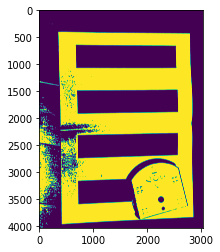

In [247]:
plt.imshow(threshold)

In [210]:
import cv2

image = cv2.imread('thymio.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
thresh = cv2.threshold(blur,160,255, cv2.THRESH_BINARY)[1]

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area > 10000:
        cv2.drawContours(image, [c], -1, (36,255,12), 3)


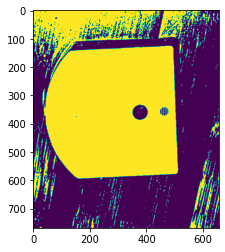

In [212]:
plt.imshow(thresh )

error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-2rx9f0ng/opencv/modules/imgproc/src/templmatch.cpp:1163: error: (-215:Assertion failed) (depth == CV_8U || depth == CV_32F) && type == _templ.type() && _img.dims() <= 2 in function 'matchTemplate'


In [219]:
### Import the needed templates for the matching


# Import template of the tymio(start) and the destination 
template_1 = cv2.imread('thymio.jpg')
template_1 = template_1[100:600,30:520]

# Import template of the destination
template_2 =  ### à faire (ROND !!!)
template_2 = template_2[???,???] ### à faire

#Import the image of the track
image = cv2.imread('images/test_2.jpg')

In [ ]:
### Find the thymio

best = 0
best_Hit = []
for i,angle in enumerate([0,90,180,270]):
    rotated = np.rot90(template_1,i) 
    name = "".join(["thymio_", str(angle)])
    listTemplate = [(name, rotated)]
    Hit = matchTemplates(listTemplate,image,method=cv2.TM_CCOEFF_NORMED, N_object=1,score_threshold=0.1, maxOverlap=0,searchBox=None)
    if Hits.Score.to_numpy()[1] > best = 0:
        best_Hit = Hit
        best_angle = angle
        
coordinates = Hits.BBox.to_numpy()
if angle == 0:
    start_point = (coordinates[0],coordinates[1]+1/2*coordinates[3])
if angle == 90:
    start_point = (coordinates[0]+1/2*coordinates[2],coordinates[1]+coordinates[3])
if angle == 180:
    start_point = (coordinates[0]+coordinates[2],coordinates[1]+1/2*coordinates[3])
if angle == 270:
    start_point = (coordinates[0]+1/2*coordinates[2],coordinates[1])
    
Overlay = drawBoxesOnRGB(image, best_Hit, showLabel=True)  

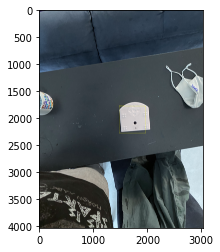

In [220]:
plt.imshow(Overlay)

In [171]:
### Find the destination

listTemplate = [("destination",template_2)]
Hit_2 = matchTemplates(listTemplate,image,method=cv2.TM_CCOEFF_NORMED, N_object=1,score_threshold=0.9, maxOverlap=0,searchBox=None)


# Show the results
Overlay_2 = drawBoxesOnRGB(image, best_Hit, showLabel=True)  
coordinates = Hits.BBox.to_numpy()
end_point = (coordinates[0]+1/2*coordinates[2],coordinates[1]+1/2*coordinates[3])

(1561, 1669, 490, 500)

In [ ]:
plt.imshow(Overlay_2)